# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [22]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt

!pip install livelossplot

## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [4]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [0]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [0]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [0]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
import livelossplot
from livelossplot import PlotLossesKeras
import keras.optimizers as opts
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler

In [25]:
Stand=StandardScaler()
Stand.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
X_train = pd.DataFrame(data=Stand.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=Stand.transform(xTest), columns=xTest.columns, index=xTest.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [27]:
X_train.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
429,-0.041830,-0.689952,-0.975168,-1.387862,1.098944,0.270702,-1.128152
42,-0.041830,-0.360777,-0.975168,-0.882817,-1.064332,-0.623031,0.886405
219,0.667148,0.462163,0.775582,-0.377773,0.017306,0.651365,0.886405
148,0.844393,1.120514,-0.099793,-0.377773,-0.523513,0.883074,0.886405
13,1.021637,0.791338,0.775582,0.632315,1.098944,0.866523,0.886405


In [0]:
#Es necesario volver array los dataframes
X_train = np.array(X_train)
y_train = np.array(yTrain)

In [0]:
X_test = np.array(X_test)
y_test = np.array(yTest)

In [0]:
y_train=np.array(y_train, ndmin=2).T

In [31]:
# As it is a regression problem the output is a neuron.
output_var = y_train.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 150
display_step = 1

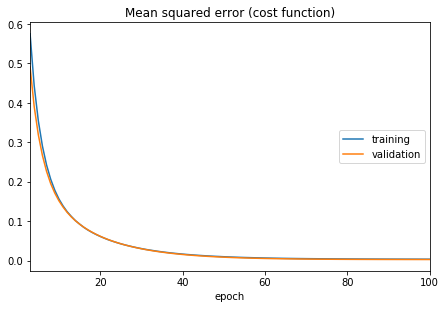

Mean squared error (cost function):
training   (min:    0.004, max:    1.789, cur:    0.004)
validation (min:    0.003, max:    1.031, cur:    0.003)


In [33]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(X_train, y_train,
          verbose=1, 
          epochs=100, 
          validation_data=[X_test,y_test],
          callbacks=[PlotLossesKeras()])

In [34]:
X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.fit(X_train, y_train, validation_data = (X_val, Y_val), epochs=50, 
          batch_size=128, verbose=True, callbacks=[best_model, early_stop]) 

Train on 297 samples, validate on 53 samples
Epoch 1/50
297/297 [==============================] - 0s 36us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 2/50
297/297 [==============================] - 0s 27us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 3/50
297/297 [==============================] - 0s 24us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 4/50
297/297 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/50
297/297 [==============================] - 0s 25us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 6/50
297/297 [==============================] - 0s 22us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/50
297/297 [==============================] - 0s 23us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 8/50
297/297 [==============================] - 0s 22us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 9/50
297/297 [==============================] - 0s 23us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 10/50
297/297 [=========================

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

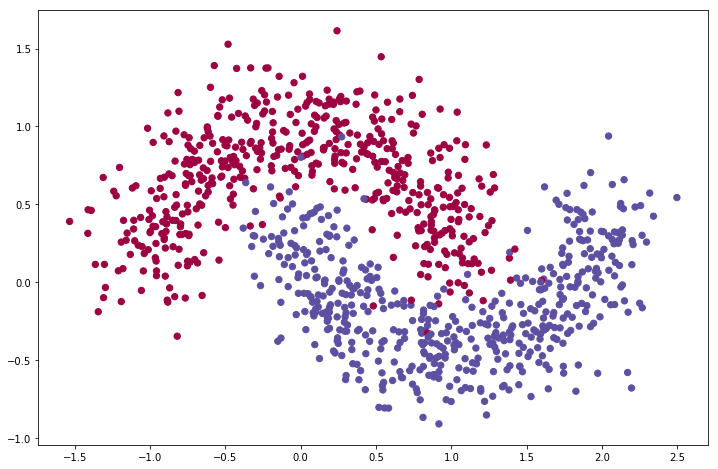

In [35]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [36]:
print('X shape',x_train.shape)
print('Y shape', y_train.shape)

X shape (1000, 2)
Y shape (1000,)


In [0]:
y_train=np.array(y_train, ndmin=2).T

In [38]:
print('X shape',x_train.shape)
print('Y shape', y_train.shape)

X shape (1000, 2)
Y shape (1000, 1)


In [39]:
# As it is a regression problem the output is a neuron.
output_var = y_train.shape[1]
print(output_var, ' output variables')

dims = x_train.shape[1]
print(dims, 'input variables')

1  output variables
2 input variables


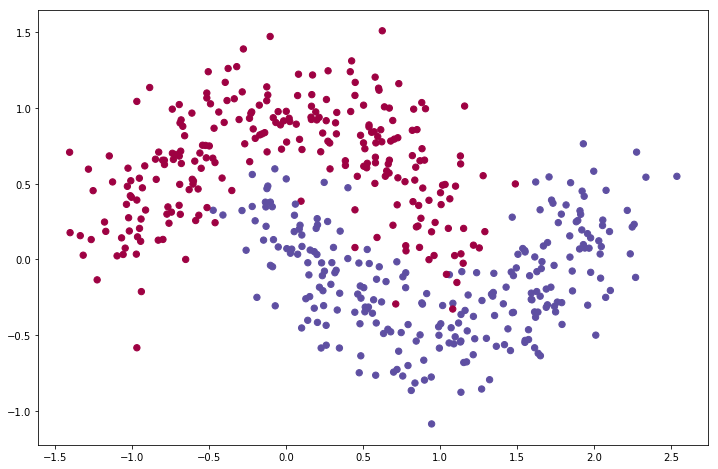

In [40]:
x_test, y_test = make_moons(n_samples=500, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_test[:, 0], x_test[:,1], c=y_test, s=40, cmap=plt.cm.Spectral);

In [41]:
print('Tamaño Variables Test')
print('X: ',x_test.shape)
print('Y: ', y_test.shape)

Tamaño Variables Test
X:  (500, 2)
Y:  (500,)


In [0]:
y_test=np.array(y_test, ndmin=2).T

In [43]:
print('Tamaño Variables Test')
print('X: ',x_test.shape)
print('Y: ', y_test.shape)

Tamaño Variables Test
X:  (500, 2)
Y:  (500, 1)


In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 100
display_step = 1

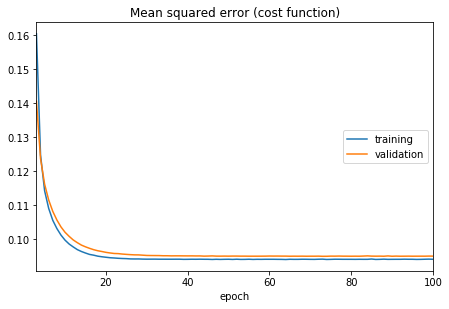

Mean squared error (cost function):
training   (min:    0.094, max:    1.639, cur:    0.094)
validation (min:    0.095, max:    0.613, cur:    0.095)


In [45]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(x_train, y_train,
          verbose=1, 
          epochs=training_epochs, 
          validation_data=[x_test,y_test],
          callbacks=[PlotLossesKeras()])

In [46]:
#Early Stop
X_train, X_val, y_train, Y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.fit(X_train, y_train, validation_data = (X_val, Y_val), epochs=training_epochs, 
          batch_size=128, verbose=True, callbacks=[best_model, early_stop]) 

Train on 850 samples, validate on 150 samples
Epoch 1/100
850/850 [==============================] - 0s 15us/step - loss: 0.0918 - val_loss: 0.1065
Epoch 2/100
850/850 [==============================] - 0s 16us/step - loss: 0.0918 - val_loss: 0.1065
Epoch 3/100
850/850 [==============================] - 0s 15us/step - loss: 0.0918 - val_loss: 0.1065
Epoch 4/100
850/850 [==============================] - 0s 13us/step - loss: 0.0918 - val_loss: 0.1065
Epoch 5/100
850/850 [==============================] - 0s 14us/step - loss: 0.0918 - val_loss: 0.1065
Epoch 6/100
850/850 [==============================] - 0s 16us/step - loss: 0.0918 - val_loss: 0.1065
Epoch 7/100
850/850 [==============================] - 0s 16us/step - loss: 0.0918 - val_loss: 0.1066
Epoch 8/100
850/850 [==============================] - 0s 15us/step - loss: 0.0918 - val_loss: 0.1066
Epoch 9/100
850/850 [==============================] - 0s 19us/step - loss: 0.0918 - val_loss: 0.1065
Epoch 10/100
850/850 [==============

**Hint:** Use the next function to plt the decision boundary,

In [47]:
model = 'Sequential neural network in keras'

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    #plt.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

#plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
#plot_decision_region(model, x_train, pred_fun)
#plot_data(x_train, y_train)

"\nHere 'model' is the neural network you previous trained.\n"

In [53]:
plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
pred_fun = model.predict
plot_decision_region(model, x_train, pred_fun)
#plot_data(x_train, y_train)

AttributeError: ignored

<Figure size 576x384 with 0 Axes>